# Convolutional Neural Networks Lab

Welcome to the Convolutional Neural Networks lab! By the end of this lab, you will have

- Defined a convolutional neural network architecture in keras
- Trained it on MNIST to recognize handwritten digits
- Visualized the learned filters

Let's get started!

## Load the Data

Since tensorflow expects images with shape `(height, width, channels)` we need to convert the dimensions of the MNIST images.

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.preprocessing.image import array_to_img, img_to_array

[X_mnist, y], _ = mnist.load_data()
X_mnist = X_mnist.astype(np.float) / 255.
X = np.expand_dims(X_mnist, axis=-1)

X.shape

Using TensorFlow backend.


(60000, 28, 28, 1)

## Define the Architecture

We will now define the following CNN architecture

$$
\mathbf{X} \in \mathbb{R}^{28 \times 28 \times 1}
\longrightarrow
\text{Conv}
\longrightarrow
\text{ReLU}
\longrightarrow
\text{Max Pool}
\longrightarrow
\text{Flatten}
\longrightarrow
\text{Dense}
\longrightarrow
\text{Softmax}
\longrightarrow
\mathbf{p} \in \mathbb{R}^{10}
$$

for classifying MNIST digits.

### Tasks

- Define this architecture

### Hints

- Check out the keras [core layers](https://keras.io/layers/core/), [convolutional](https://keras.io/layers/convolutional/), and [pooling](https://keras.io/layers/pooling/) documentation
- Use whatever hyperparameters you think are most appropriate

In [2]:
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Activation, Dense, Flatten
from keras.constraints import nonneg

nb_filter = 16

model = Sequential()
model.add(Convolution2D(filters=nb_filter, kernel_size=10, kernel_constraint=nonneg(), kernel_regularizer=l2(1e-3), name='conv', input_shape=X[0].shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten(name='flatten'))
model.add(Dense(units=10, kernel_regularizer=l2(1e-3), name='softmax_weights'))
model.add(Activation('softmax', name='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv (Conv2D)                (None, 19, 19, 16)        1616      
_________________________________________________________________
activation_1 (Activation)    (None, 19, 19, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
softmax_weights (Dense)      (None, 10)                5770      
_________________________________________________________________
softmax (Activation)         (None, 10)                0         
Total params: 7,386.0
Trainable params: 7,386.0
Non-trainable params: 0.0
_________________________________________________________________


## Fit on MNIST

It's time to compile your model and fit it on MNSIT.

### Tasks

- Compile your model
- Fit it on MNIST

In [3]:
from keras.utils.np_utils import to_categorical

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
nb_train = 10_000
model.fit(X[:nb_train], to_categorical(y[:nb_train]), validation_split=.1, epochs=5)

Train on 9000 samples, validate on 1000 samples
Epoch 1/5
9000/9000 [==============================] - 7s - loss: 0.8818 - acc: 0.7544 - val_loss: 0.4819 - val_acc: 0.8630

## Display Learned Filters

We can visualize what the CNN learned by displaying some of the filters in the convolutional layer.

### Tasks

- Display some filters from the convolutional layer

### Hints

- Examine `models.layers` and get a reference to the conv layer
- Use `keras.layers.Layer.get_weights()` to get the filter weights
- The filters `W` will be a `4darray` with shape `(F, F, 1, nb_filter)`. Use `W[..., i]` to get a reference to filter number `i`
- Use `keras.preprocessing.image.array_to_img()` to display it
- Try using `kernel_constraint=keras.constraints.non_neg()` to get cleaner filters in your convolution layer

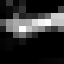

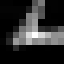

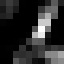

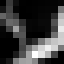

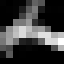

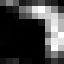

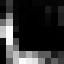

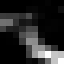

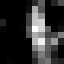

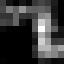

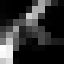

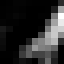

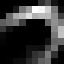

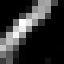

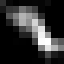

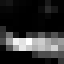

In [4]:
from IPython.display import display

W, b = model.get_layer('conv').get_weights()
for i in range(nb_filter):
    w = W[..., i]
    img = array_to_img(w, data_format='channels_last').resize(size=[64, 64])
    display(img)

## Go Crazy

- Try beating your top score from yesterday

### Tasks

- Perform hyperparameter searches to improve your MNIST score

### Hints

Try tweaking

- The number of convolutional blocks
- Stride
- Number of filters
- Max pooling size
- The number of Dense layers

### Requirements

- Only use sgd
- Train for a maximum of five epochs

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[28, 28, 1]))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [6]:
nb_train = 10_000
model.fit(X[:nb_train], to_categorical(y[:nb_train]), validation_split=.1, epochs=1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/1
9000/9000 [==============================] - 39s - loss: 0.6265 - acc: 0.8032 - val_loss: 0.1996 - val_acc: 0.9390

## Bonus Activities

- Wrap your code to display filters in a keras callback and call it after every every epoch to see the filters update during training
- Associate each digit class with the filters whose strong activations provide the most evidence for the class (this would be cool!)